In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split

In [3]:
# Read data set.
data =pd.read_csv("Churn_Modelling.csv")

In [4]:
# Chcek the shape of dataset. 
data.shape

(10000, 14)

In [5]:
# Dataset contain the 10000 row and 14 columns.

In [6]:
# How the observation looks in dataframe.
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# DataFrame contain follwoing columns.
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# Check the data type of each column in data frame. 
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
# Following columns are not important for modelso we remove from it.It contain unique values eiter name,roll number,
# custmer id thses are not important for model building.
data.drop("RowNumber",axis=1,inplace=True)
data.drop("CustomerId",axis=1,inplace=True)
data.drop("Surname",axis=1,inplace=True)

In [10]:
# After deleting column following columns remainig the dataframe.
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data.shape

(10000, 11)

In [12]:
# Dataset contain 10000 row and 11 columns.

In [13]:
# Here we copy dtaframe to df for further processing. 
df=data.copy()

In [14]:
# Chcek the information of data. 
# It gives datatype and non null count for each column including name. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
# Chcek the missing values column wise in dataframe.
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
# No misisng values in this dataset

In [17]:
# Chcek the summary statistics of data for only numerical columns
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
# discriptive statistics gives the clear understanding of numerical column like count,mean,standerd devation,minimum value,maximum 
# value,25 percentile,75 percentile.

In [19]:
for col in df:
    print(f'{col}:{df[col].value_counts()}')
    print("---------------------------------------------------------------------------------------------------")
    print("---------------------------------------------------------------------------------------------------")

CreditScore:850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Geography:France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Gender:Male      5457
Female    4543
Name: Gender, dtype: int64
---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------
Age:37    478
38    477
35    474
36    456
34    447
     ... 
92    

## Data visualization 

In [20]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [21]:
from pylab import *
rcParams['figure.figsize'] = 10,5

In [22]:
# Check the value count for the Exited column. 
pd.DataFrame(df["Exited"].value_counts())

,Exited
0,7963
1,2037


<AxesSubplot:>

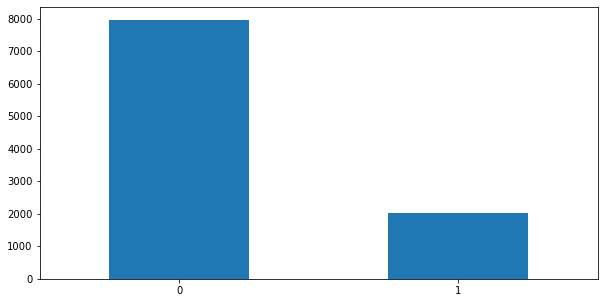

In [23]:
# Visulaization of the churn varible customer is exited or not using bar plot.
df["Exited"].value_counts().plot.bar(rot=0)
# Here o menas customer is not exited or 1 means exited.

In [24]:
# Here the count of o (customer non exited )is high and count of 1 is less (customer exited) 
# data is not balnced then we need to balnce this dataset.
# we need to balnce dataset.
# first visualise all data.

In [25]:
import seaborn as sns 

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


<AxesSubplot:xlabel='Geography', ylabel='count'>

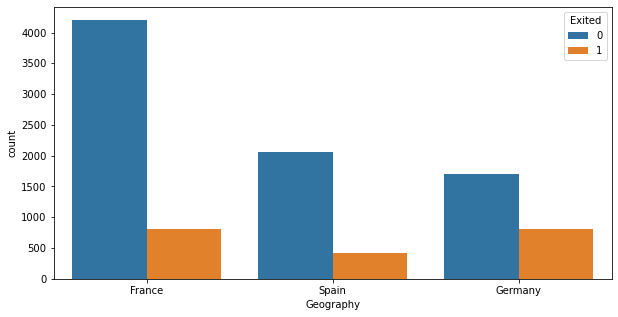

In [26]:
# For geography 
print(df["Geography"].value_counts())
sns.countplot(x="Geography", hue="Exited", data=df)

Male      5457
Female    4543
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

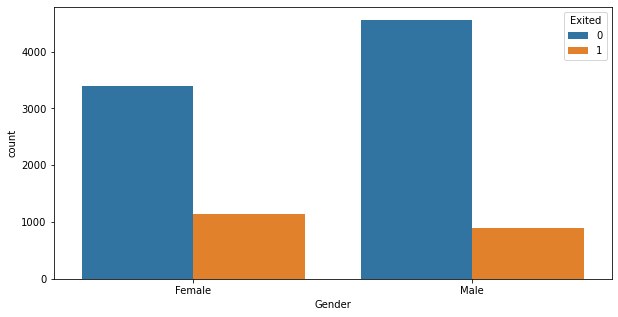

In [27]:
# For Gender
print(df["Gender"].value_counts())
sns.countplot(x="Gender", hue="Exited", data=df)

In [28]:
# Age column 

In [29]:
df["Age"].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [30]:
# Here age column has the min value is 18 and for the max value 92
# Convert it into bins using the cut fucntion in python.

In [31]:
df["age_inerval"]=pd.cut(df['Age'], range(10, 100, 10))

In [32]:
df["age_inerval"].value_counts()

(30, 40]    4451
(40, 50]    2320
(20, 30]    1879
(50, 60]     797
(60, 70]     331
(70, 80]     121
(10, 20]      89
(80, 90]      10
Name: age_inerval, dtype: int64

<AxesSubplot:>

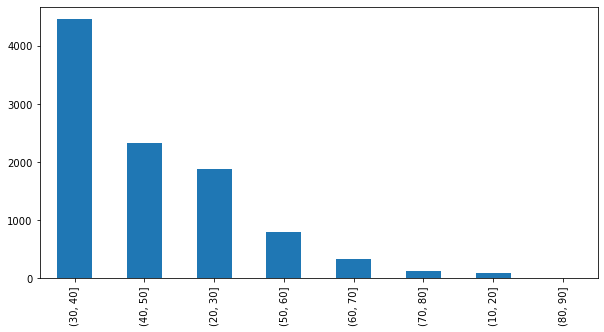

In [33]:
df["age_inerval"].value_counts().plot(kind="bar")

(30, 40]    4451
(40, 50]    2320
(20, 30]    1879
(50, 60]     797
(60, 70]     331
(70, 80]     121
(10, 20]      89
(80, 90]      10
Name: age_inerval, dtype: int64


<AxesSubplot:xlabel='age_inerval', ylabel='count'>

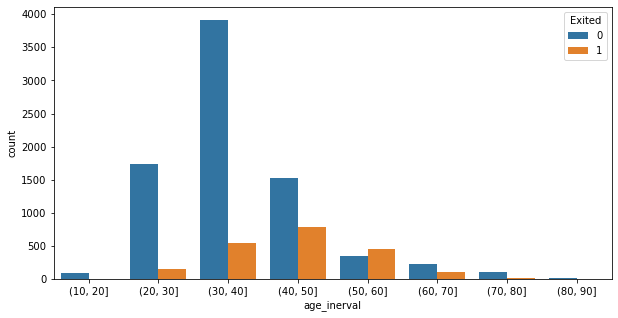

In [34]:
# plot age_inerval count plot with exited column.
print(df["age_inerval"].value_counts())
sns.countplot(x="age_inerval", hue="Exited", data=df)

In [35]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_inerval'],
      dtype='object')

In [36]:
df["Tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


<AxesSubplot:xlabel='Tenure', ylabel='count'>

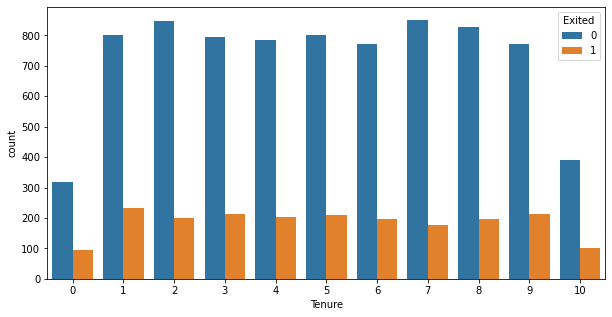

In [37]:
# plot count plot with exited column.
print(df["Tenure"].value_counts())
sns.countplot(x="Tenure", hue="Exited", data=df)

In [38]:
# Here Balance is umerical column 
# Here we convert into categorical column and plot with Exited

In [39]:
df["Balance"].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [40]:
df["Balance_interval"]=pd.cut(df['Balance'], range(0,250899,10000))

(120000, 130000]    898
(110000, 120000]    832
(100000, 110000]    786
(130000, 140000]    734
(90000, 100000]     599
(140000, 150000]    580
(80000, 90000]      400
(150000, 160000]    386
(70000, 80000]      274
(160000, 170000]    264
(170000, 180000]    159
(60000, 70000]      156
(180000, 190000]     86
(50000, 60000]       80
(40000, 50000]       46
(190000, 200000]     40
(200000, 210000]     21
(30000, 40000]       17
(210000, 220000]      9
(20000, 30000]        8
(10000, 20000]        3
(220000, 230000]      2
(0, 10000]            1
(230000, 240000]      1
(240000, 250000]      0
Name: Balance_interval, dtype: int64


<AxesSubplot:xlabel='Balance_interval', ylabel='count'>

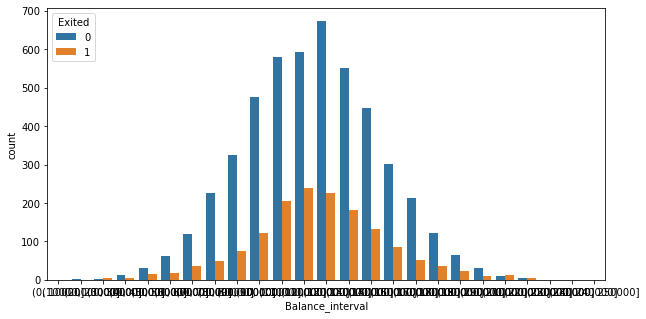

In [41]:
# plot count plot with exited column.
print(df["Balance_interval"].value_counts())
sns.countplot(x="Balance_interval", hue="Exited", data=df)

In [42]:
# NumOfProducts
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

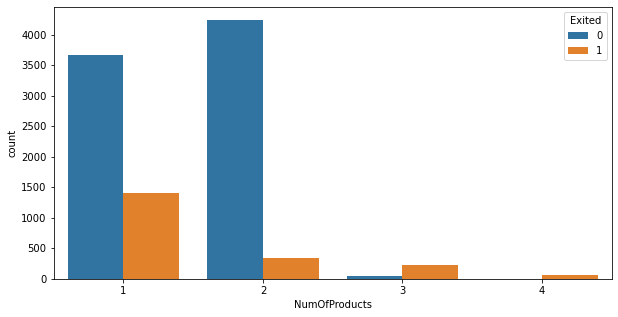

In [43]:
# plot count plot with exited column.
print(df["NumOfProducts"].value_counts())
sns.countplot(x="NumOfProducts", hue="Exited", data=df)

In [44]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_inerval', 'Balance_interval'],
      dtype='object')

In [45]:
# for HasCrCard
df["HasCrCard"].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

1    7055
0    2945
Name: HasCrCard, dtype: int64


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

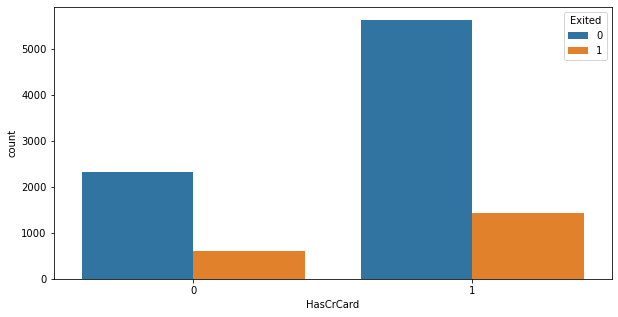

In [46]:
print(df["HasCrCard"].value_counts())
sns.countplot(x="HasCrCard", hue="Exited", data=df)

1    5151
0    4849
Name: IsActiveMember, dtype: int64


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

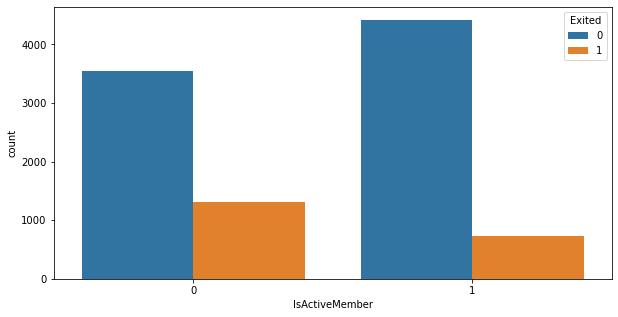

In [47]:
# For IsActiveMember
print(df["IsActiveMember"].value_counts())
sns.countplot(x="IsActiveMember", hue="Exited", data=df)

In [48]:
# For EstimatedSalary
df["EstimatedSalary"].value_counts()
# This is numerical column we convert it into the bins and plot with Exited


24924.92     2
109029.72    1
182025.95    1
82820.85     1
30314.04     1
            ..
158302.59    1
171037.63    1
43036.60     1
55034.02     1
104181.78    1
Name: EstimatedSalary, Length: 9999, dtype: int64

In [49]:
df["EstimatedSalary"].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [50]:
df["age_EstimatedSalary"]=pd.cut(df['EstimatedSalary'], range(0, 200000, 10000))

In [51]:
df["age_EstimatedSalary"].value_counts()

(100000, 110000]    536
(170000, 180000]    531
(140000, 150000]    521
(70000, 80000]      520
(80000, 90000]      510
(0, 10000]          508
(50000, 60000]      508
(60000, 70000]      507
(120000, 130000]    505
(130000, 140000]    502
(40000, 50000]      498
(20000, 30000]      492
(90000, 100000]     492
(110000, 120000]    491
(160000, 170000]    478
(10000, 20000]      478
(30000, 40000]      477
(180000, 190000]    476
(150000, 160000]    461
Name: age_EstimatedSalary, dtype: int64

<AxesSubplot:xlabel='age_EstimatedSalary', ylabel='count'>

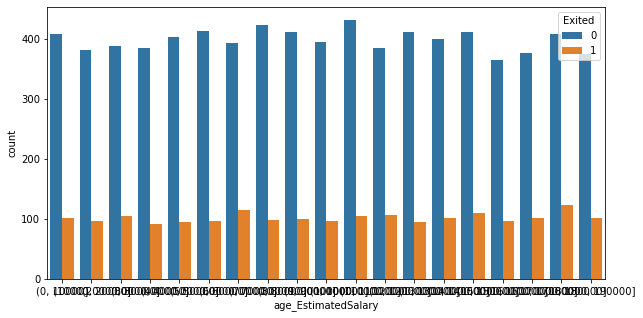

In [52]:
sns.countplot(x="age_EstimatedSalary", hue="Exited", data=df)

In [53]:
########

In [54]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_inerval,Balance_interval,age_EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(40, 50]",NaN,"(100000, 110000]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(40, 50]","(80000.0, 90000.0]","(110000, 120000]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(40, 50]","(150000.0, 160000.0]","(110000, 120000]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(30, 40]",NaN,"(90000, 100000]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(40, 50]","(120000.0, 130000.0]","(70000, 80000]"


In [55]:
df1=df.drop(["age_inerval","Balance_interval","age_EstimatedSalary"],axis=1)
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [56]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
# Convert categorical into dummies varible using get_dummies function.
df1=pd.get_dummies(data=df1,columns=["Geography","Gender","Tenure","NumOfProducts"])

In [58]:
# Scale the following numerical varible.each column has diffrent scale.
# Age,CreditScore,Balance,EstimatedSalary

In [59]:
# Using minimax scaler function here we scale numerical columns.

In [60]:
col_scale=["Age","CreditScore","Balance","EstimatedSalary"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [61]:
df1[col_scale] = scaler.fit_transform(df1[col_scale])

In [62]:
df1.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0.324324,0.000000,1,1,0.506735,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.516,0.310811,0.334031,0,1,0.562709,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.304,0.324324,0.636357,1,0,0.569654,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.698,0.283784,0.000000,0,0,0.469120,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.000,0.337838,0.500246,1,1,0.395400,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [63]:
df1.tail()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
9995,0.842,0.283784,0.000000,1,0,0.481341,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
9996,0.332,0.229730,0.228657,1,1,0.508490,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
9997,0.718,0.243243,0.000000,0,1,0.210390,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
9998,0.844,0.324324,0.299226,1,0,0.464429,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9999,0.884,0.135135,0.518708,1,0,0.190914,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
X=df1.drop(["Exited"],axis=1)
y=df1["Exited"]

In [65]:
print("Before Applyiing SMOTE technique.")
Counter(y)

Before Applyiing SMOTE technique.


Counter({1: 2037, 0: 7963})

In [66]:
# Here our data is imbalanced we need to conert it into balanced datatset.

In [67]:
sm = SMOTE(random_state=50)
X_res, y_res = sm.fit_resample(X, y)

In [68]:
# After applying smote technique 
print("After Applyiing SMOTE technique.")
Counter(y_res)
# Now data is balanced 

After Applyiing SMOTE technique.


Counter({1: 7963, 0: 7963})

In [69]:
## Split data into train and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=5)

In [70]:
X_train.shape,X_test.shape

((11148, 26), (4778, 26))

In [71]:
y_train.shape,y_test.shape

((11148,), (4778,))

## Build NN model 

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [73]:
model=Sequential()
# Add Dense layer 
model.add(Dense(64,input_shape=(26,),activation='relu'))

# add anther dense layer 
model.add(Dense(32, activation='relu'))

# add anther dense layer 
model.add(Dense(16, activation='relu'))

# Add last layer of NN
model.add(Dense(1,activation="sigmoid"))

# comlile model 
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1728      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Fit model on training dataset
model.fit(X_train, y_train,batch_size=1,epochs=50)

Epoch 1/50
11148/11148 [==============================] - 11s 1ms/step - loss: 0.4982 - accuracy: 0.7557
Epoch 2/50
11148/11148 [==============================] - 11s 1ms/step - loss: 0.4408 - accuracy: 0.7951
Epoch 3/50
11148/11148 [==============================] - 11s 1ms/step - loss: 0.4157 - accuracy: 0.8061
Epoch 4/50
11148/11148 [==============================] - 11s 1ms/step - loss: 0.4001 - accuracy: 0.8172
Epoch 5/50
11148/11148 [==============================] - 12s 1ms/step - loss: 0.3908 - accuracy: 0.8219
Epoch 6/50
11148/11148 [==============================] - 12s 1ms/step - loss: 0.3818 - accuracy: 0.8267
Epoch 7/50
11148/11148 [==============================] - 11s 1ms/step - loss: 0.3723 - accuracy: 0.8358
Epoch 8/50
11148/11148 [==============================] - 11s 1ms/step - loss: 0.3656 - accuracy: 0.8344
Epoch 9/50
11148/11148 [==============================] - 11s 1ms/step - loss: 0.3580 - accuracy: 0.8439
Epoch 10/50
11148/11148 [==============================

In [76]:
# Evlaute model on test data 
model.evaluate(X_test, y_test)

150/150 [==============================] - 0s 971us/step - loss: 0.5085 - accuracy: 0.8489


[0.5085298418998718, 0.8488907217979431]

In [77]:
# Predict model on test data.
predicted  = model.predict(X_test)
predicted

array([[3.0220079e-01],
       [5.8580838e-07],
       [4.7426522e-03],
       ...,
       [9.9635208e-01],
       [1.0000000e+00],
       [7.7963686e-01]], dtype=float32)

In [78]:
for threshold in np.arange(0.3, 1.0, 0.01):
    print("--------------------------------------------")
    print("--------------------------------------------")
    pred=[]
    print("threshold is", threshold)
    for i in predicted:
        if i > threshold:
                pred.append(1)
        else:
                pred.append(0)
    
    print(classification_report(y_test,pred))
    del pred
                

--------------------------------------------
--------------------------------------------
threshold is 0.3
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2397
           1       0.80      0.91      0.85      2381

    accuracy                           0.84      4778
   macro avg       0.85      0.84      0.84      4778
weighted avg       0.85      0.84      0.84      4778

--------------------------------------------
--------------------------------------------
threshold is 0.31
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2397
           1       0.80      0.91      0.85      2381

    accuracy                           0.84      4778
   macro avg       0.85      0.84      0.84      4778
weighted avg       0.85      0.84      0.84      4778

--------------------------------------------
--------------------------------------------
threshold is 0.32
              precision

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2397
           1       0.85      0.84      0.85      2381

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778

--------------------------------------------
--------------------------------------------
threshold is 0.5700000000000003
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2397
           1       0.85      0.84      0.85      2381

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778

--------------------------------------------
--------------------------------------------
threshold is 0.5800000000000003
              precision    recall  f1-score   support

           0       0.84      0.85      0.85    

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      2397
           1       0.88      0.73      0.80      2381

    accuracy                           0.81      4778
   macro avg       0.82      0.81      0.81      4778
weighted avg       0.82      0.81      0.81      4778

--------------------------------------------
--------------------------------------------
threshold is 0.8200000000000005
              precision    recall  f1-score   support

           0       0.76      0.90      0.83      2397
           1       0.88      0.72      0.79      2381

    accuracy                           0.81      4778
   macro avg       0.82      0.81      0.81      4778
weighted avg       0.82      0.81      0.81      4778

--------------------------------------------
--------------------------------------------
threshold is 0.8300000000000005
              precision    recall  f1-score   support

           0       0.76      0.91      0.83    

In [79]:
## choosing the treshold 0.55

In [80]:
pred=[]
for i in predicted:
        if i > 0.56:
                pred.append(1)
        else:
                pred.append(0)
    
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2397
           1       0.85      0.84      0.85      2381

    accuracy                           0.85      4778
   macro avg       0.85      0.85      0.85      4778
weighted avg       0.85      0.85      0.85      4778



### Here our model preidct very well on test data 
### Model give 90.77% accuarcy on train data set and 85.00% accuarcy on test dataset.

In [81]:
# model save
# model.save('Churn_predicition_model1.h5')